In [1]:
#FINOVA ML TAK 1 (BEGINNER)
#THARUN ADITHYAN
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
df = pd.read_csv("deliveries.csv")
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


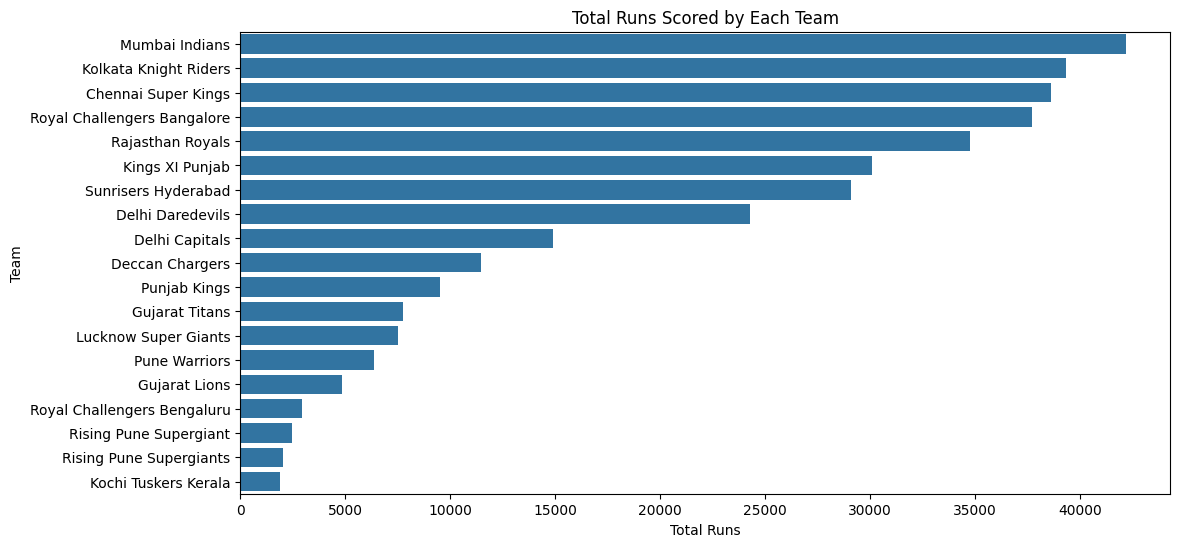

In [2]:
# 1. Find and visualize the total runs scored by each team.
team_runs = df.groupby("batting_team")["total_runs"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=team_runs.values, y=team_runs.index)
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.title("Total Runs Scored by Each Team")
plt.show()

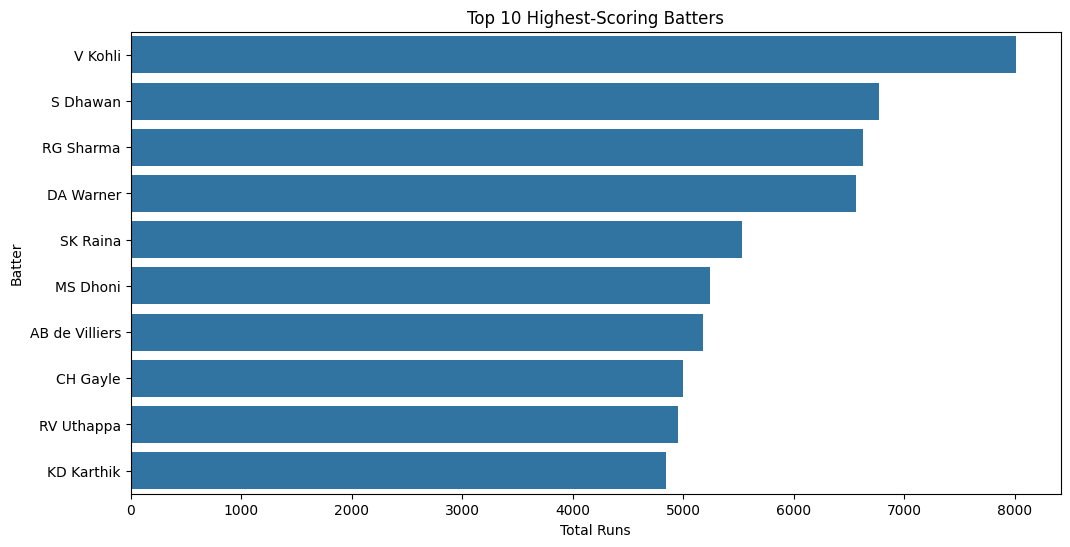

In [3]:
# 2. Identify and display the names of the top 10 highest-scoring batters with their total runs scored.
top_batters = df.groupby("batter")["batsman_runs"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_batters.values, y=top_batters.index)
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.title("Top 10 Highest-Scoring Batters")
plt.show()

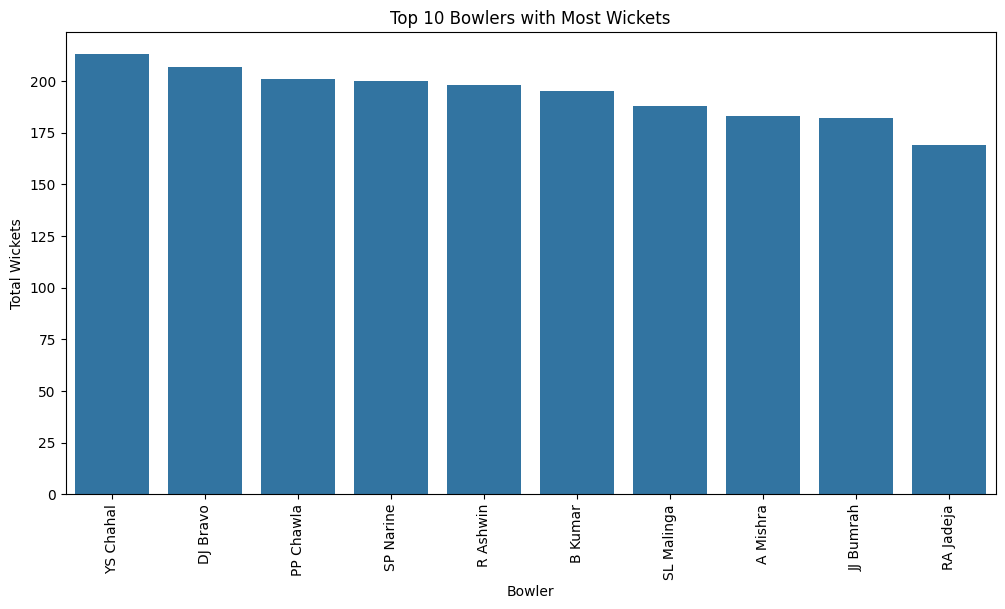

In [4]:
# 3. Find and visualize the top 10 bowlers with the most wickets.
top_bowlers = df[df["is_wicket"] == 1].groupby("bowler")["is_wicket"].count().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values)
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.title("Top 10 Bowlers with Most Wickets")
plt.show()

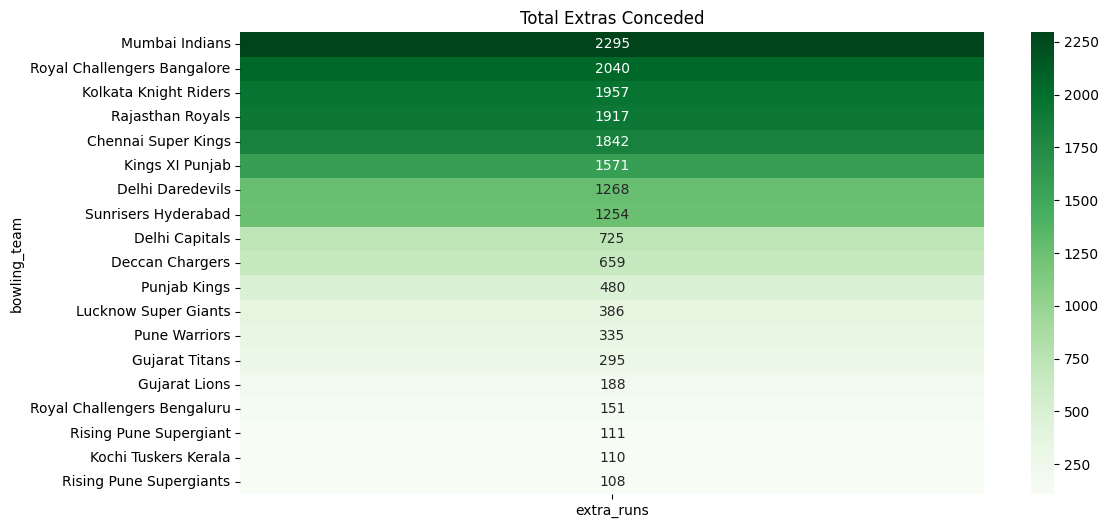

In [5]:
# 4. Tabulate and visualize the total number of extras conceded by each team.
team_extras = df.groupby("bowling_team")["extra_runs"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.heatmap(team_extras.to_frame(), annot=True, cmap="Greens", fmt="d")
plt.title("Total Extras Conceded")
plt.show()

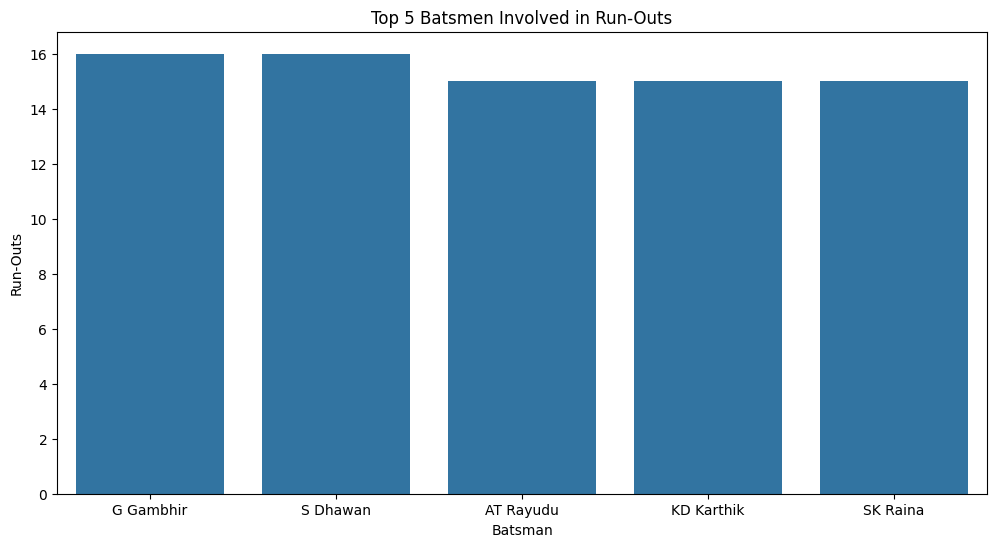

In [6]:
# 5. Tabulate and visualize the batsmen (top 5) involved in the most run-outs.
runouts = df[df["dismissal_kind"] == "run out"].groupby("player_dismissed")["dismissal_kind"].count().nlargest(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=runouts.index, y=runouts.values)
plt.xlabel("Batsman")
plt.ylabel("Run-Outs")
plt.title("Top 5 Batsmen Involved in Run-Outs")
plt.show()

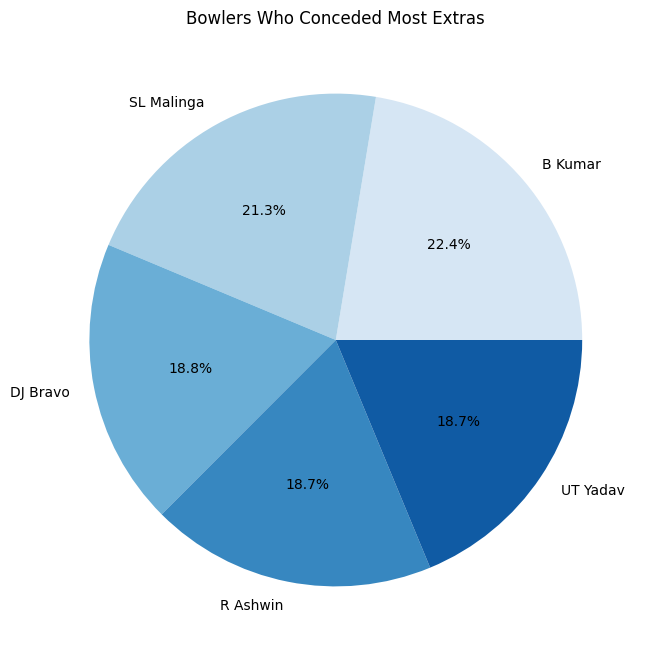

In [7]:
# 6. Tabulate and visualize the top 5 bowlers who conceded the most extras.
top_extra_bowlers = df.groupby("bowler")["extra_runs"].sum().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_extra_bowlers.values, labels=top_extra_bowlers.index, autopct='%1.1f%%', colors=sns.color_palette("Blues", 5))
plt.title("Bowlers Who Conceded Most Extras")
plt.show()

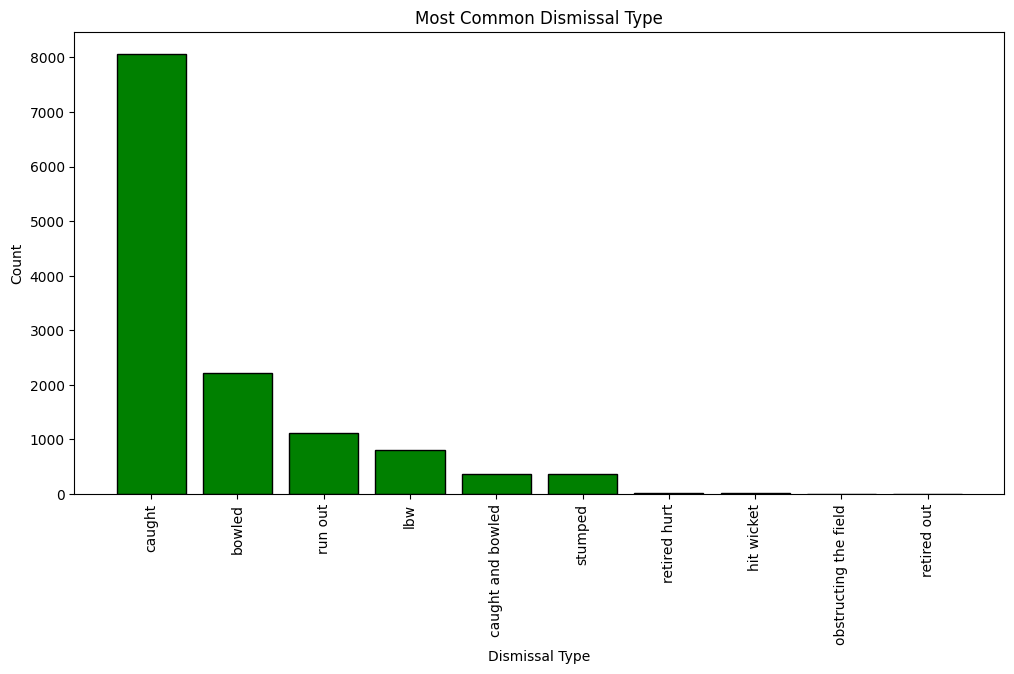

In [8]:
# 7. Tabulate and visualize the most common dismissal type.
dismissal_types = df["dismissal_kind"].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(dismissal_types.index, dismissal_types.values, color="green", edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.title("Most Common Dismissal Type")
plt.show()

C:\Users\THARUN\AppData\Local\Temp\ipykernel_27308\4247479078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=over_runrate.index, y=over_runrate.values, palette="Blues")


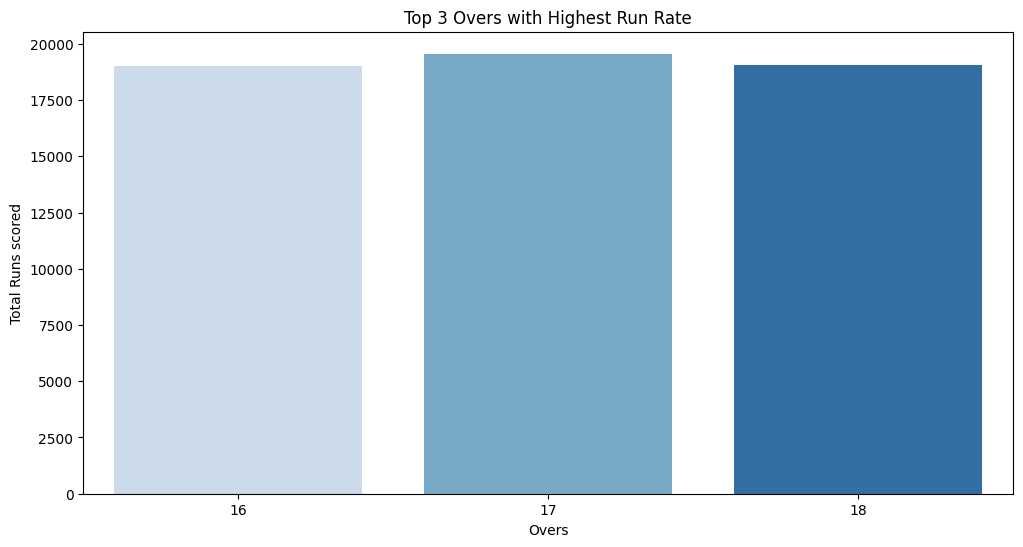

In [9]:
# 8. Find and display which of the top 3 overs has the highest run rate.
over_runrate = df.groupby("over")["total_runs"].sum().nlargest(3)
plt.figure(figsize=(12, 6))
sns.barplot(x=over_runrate.index, y=over_runrate.values, palette="Blues")
plt.xlabel("Overs")
plt.ylabel("Total Runs scored")
plt.title("Top 3 Overs with Highest Run Rate")
plt.show()

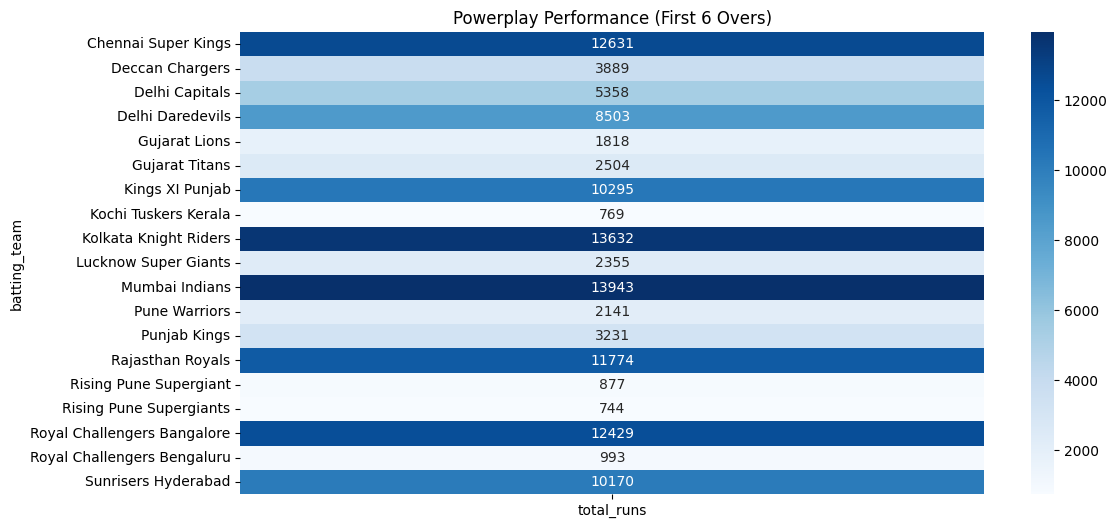

In [10]:
# 9. Analyze and visualize powerplay performance (first 6 overs).
powerplay = df[df["over"] <= 6].groupby("batting_team")["total_runs"].sum()
plt.figure(figsize=(12, 6))
sns.heatmap(powerplay.to_frame(), annot=True, cmap="Blues", fmt="d")
plt.title("Powerplay Performance (First 6 Overs)")
plt.show()

C:\Users\THARUN\AppData\Local\Temp\ipykernel_27308\4028356926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fours.index, y=fours.values, palette="Blues", label="Fours")
C:\Users\THARUN\AppData\Local\Temp\ipykernel_27308\4028356926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sixes.index, y=sixes.values, palette="Greens", label="Sixes")


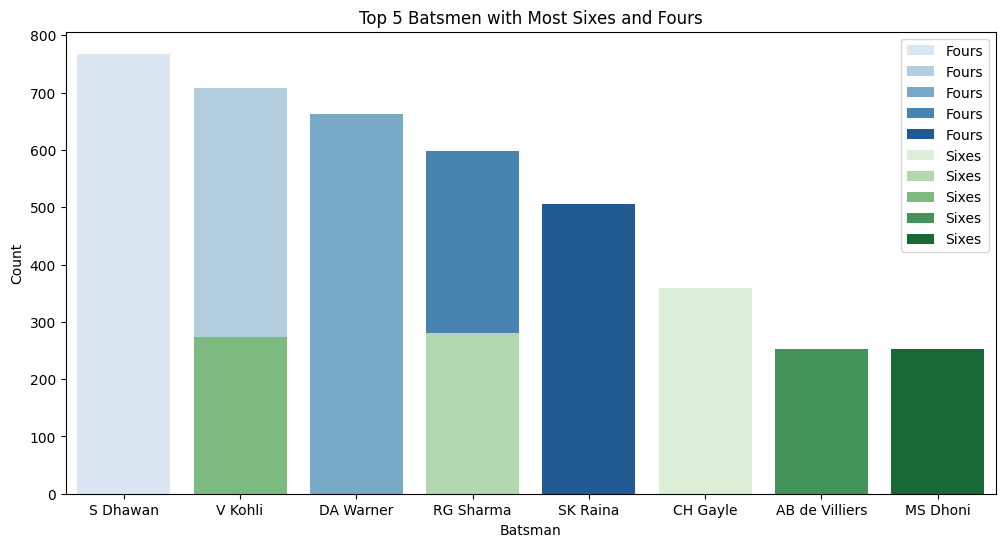

In [11]:
# 10. Tabulate and visualize the top 5 batsmen with the most sixes and fours.
fours = df[df["batsman_runs"] == 4].groupby("batter")["batsman_runs"].count().nlargest(5)
sixes = df[df["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count().nlargest(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=fours.index, y=fours.values, palette="Blues", label="Fours")
sns.barplot(x=sixes.index, y=sixes.values, palette="Greens", label="Sixes")
plt.xlabel("Batsman")
plt.ylabel("Count")
plt.title("Top 5 Batsmen with Most Sixes and Fours")
plt.legend()
plt.show()
